## Dataset Humsavar 

In [7]:
hum <- read.table("~/workspace/master-thesis/data/processed/1/humsavar_full_gt.csv.gz", sep=",", header=TRUE)

In [11]:
dataset <- read.table("../data/processed/1/dataset.csv.gz", sep=",", header=TRUE)

### Dimensionality Reduction

In [13]:
dataset

MUTANT,TYPE,CHARGE,VOLUME,HYDROPHOBICITY,GRANTHAM,POLARITY,EX,PAM250,BLOSUM,⋯,AROMATICITY_DIFF,AROMATICITY_LOG_RATIO,ISOELECTRIC_POINT_DIFF,ISOELECTRIC_POINT_LOG_RATIO,GRAVY_DIFF,GRAVY_LOG_RATIO,INSTABILITY_INDEX_DIFF,INSTABILITY_INDEX_LOG_RATIO,FLEXIBILITY_DIFF,FLEXIBILITY_LOG_RATIO
P04217-52-H-R,Polymorphism,0,-0.67333333,9.3,29,0.1,28,1.0,0,⋯,0.004166667,-0.06453852,0.0172119141,-3.946269e-03,0.207500000,-2.867898902,3.9683333,0.298544834,0.0089543651,-0.0090180802
P04217-395-H-R,Polymorphism,0,-0.67333333,9.3,29,0.1,28,1.0,0,⋯,0.000000000,NA,1.1546630859,-1.920386e-01,0.401250000,-0.362372965,15.0679167,-0.297907433,0.0174336735,-0.0174099087
Q9NQ94-555-V-M,Polymorphism,0,-0.76333333,-0.8,21,-0.2,56,1.8,1,⋯,0.000000000,NA,0.0000000000,0.000000e+00,0.052083333,-0.495321437,2.3862500,-0.034999310,0.0033208617,0.0033058385
Q9NQ94-558-A-S,Polymorphism,0,-0.01333333,1.0,99,1.1,38,1.1,1,⋯,0.000000000,NA,0.0000000000,0.000000e+00,0.258750000,0.690740441,14.6808333,-0.329532451,0.0119311224,-0.0118058390
A8K2U0-207-G-R,Polymorphism,-1,-3.77666667,13.3,125,1.5,18,-1.0,-2,⋯,0.050000000,0.22314355,0.5332031250,-1.181227e-01,0.460416667,-4.313033763,7.2975000,-0.191561438,0.0081910431,-0.0082516696
A8K2U0-970-C-Y,Polymorphism,0,-2.83666667,2.7,194,0.7,35,-0.4,-2,⋯,0.066666667,NA,0.0000000000,0.000000e+00,0.207083333,1.220659723,15.9525000,0.287147630,0.0015688776,-0.0015436356
A8K2U0-1131-T-M,Polymorphism,0,-1.56000000,-2.2,81,-2.9,15,-0.4,-1,⋯,0.004166667,-0.06453852,0.0000000000,0.000000e+00,0.186250000,0.367037731,15.6470833,-1.746165201,0.0114767574,0.0114080680
A8K2U0-1412-T-A,Polymorphism,0,0.91666667,-0.4,58,-0.5,40,0.7,0,⋯,0.008333333,-0.06453852,0.0000000000,0.000000e+00,0.374583333,4.046335343,9.7837500,NA,0.0068948413,0.0068169264
A8K2U0-850-D-E,Polymorphism,0,-0.91000000,-1.0,45,-0.7,34,2.9,2,⋯,0.004166667,-0.06453852,0.8165283203,-1.478866e-01,0.170416667,0.199151125,2.9620833,-0.052989715,0.0051218821,0.0050544134
A8K2U0-1229-H-R,Polymorphism,0,-0.67333333,9.3,29,0.1,28,1.0,0,⋯,0.012500000,-0.06453852,1.4241943359,-1.537406e-01,0.125000000,0.485507816,16.9929167,0.325852072,0.0031425737,-0.0031249484


### Correlations

In [14]:
library('corrplot')
library('RColorBrewer')

In [15]:
Mpearson <- cor(hum[sapply(hum, is.numeric)], method="pearson", use="complete.obs")
# Mspearman <- cor(hum[sapply(hum, is.numeric)], method="spearman", use="complete.obs")
pval <- cor.mtest(hum[sapply(hum, is.numeric)], conf.level=.95)$p

Warning message in cor(hum[sapply(hum, is.numeric)], method = "pearson", use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warn

In [4]:
pdf("../documents/resources/corrplot_2.pdf", 7, 5)
corrplot(Mpearson, p.mat=pval, insig="blank", method='color', tl.col='black',
         diag=FALSE, tl.srt=90, tl.cex=0.6, sig.level=.05,
         col=rev(brewer.pal(n=8, name="RdYlBu"))) 
dev.off()

png 
  2

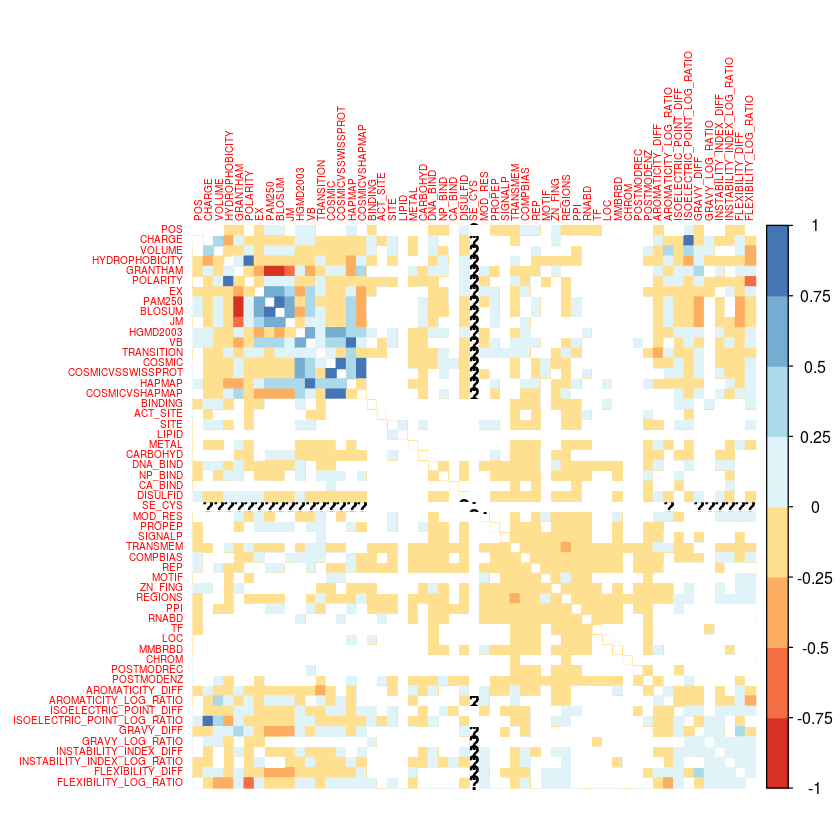

In [9]:
corrplot(Mspearman, p.mat=pval, insig="blank", method='color',
         diag=FALSE, tl.srt=90, tl.cex=0.5, sig.level=.05,
         col = brewer.pal(n = 8, name = "RdYlBu"))

### AUC Curves

In [15]:
library('pROC')
library('pracma')

ERROR: Error in library("pracma"): there is no package called ‘pracma’


In [18]:
mean_tpr <- colMeans(read.table("../results/humsavar/rf_tprs.csv", sep=",", header=TRUE))
mean_fpr <- seq(0, 1, length=100)

In [6]:
help(roc)

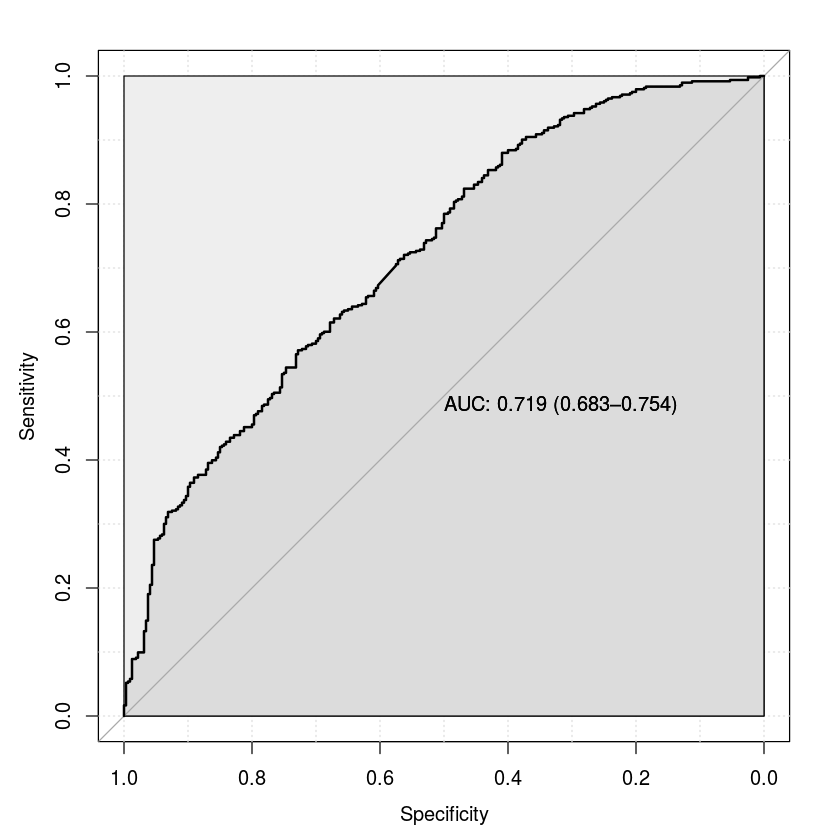

In [24]:
roc <- roc(results$y_true, results$score,
    ci=TRUE, boot.n=100, ci.alpha=0.9, stratified=FALSE,
    # arguments for plot
    plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
    print.auc=TRUE, show.thres=TRUE)